# **Image and Video Analytics Assignment-1**

Name: U.Sai Harika

Roll no: 160122771086

Section: AI&DS-I2

Subject Code: 22ADE25

# **Practical Implementation:Part-B**

In [9]:
from google.colab import drive  # Import Google Drive module
drive.mount('/content/drive')  # Mount Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.Sample project for Color detection**

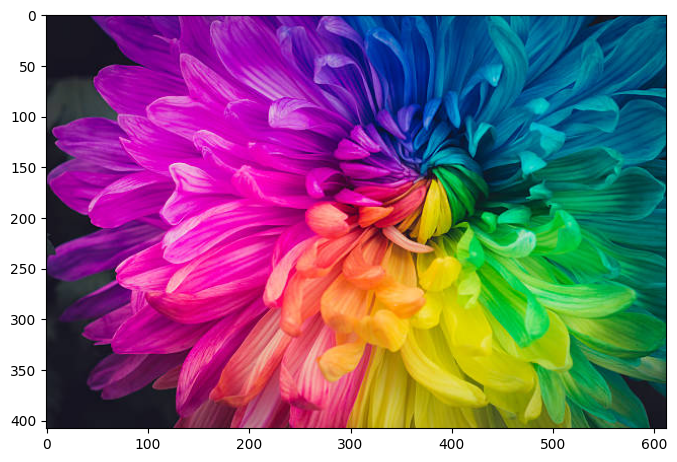

Detected Color: Razzle Dazzle Rose Hex: #f3c
RGB Values - R: 252, G: 57, B: 197


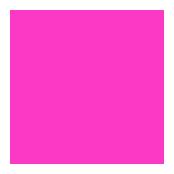

In [10]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset containing color names and RGB values
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv("/content/drive/MyDrive/IVA Assignment-1/colors.xls", header=None, names=index)

# Load the image from Google Drive
img_path = "/content/drive/MyDrive/IVA Assignment-1/colorpics.jpg"
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Error: Image not found!")

# Convert image to RGB format for displaying in Colab
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with axis for coordinate selection
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("on")
plt.show()

# Function to find the closest color name from the dataset
def colorname(B, G, R):
    minimum = 10000
    cname = "Unknown Color"
    for _, row in df.iterrows():
        try:
            d = abs(B - int(row["B"])) + abs(G - int(row["G"])) + abs(R - int(row["R"]))
            if d < minimum:
                minimum = d
                cname = row["color_name"] + " Hex: " + row["hex"]
        except ValueError:
            continue
    return cname

# Define coordinates for color detection
xpos, ypos = 200, 200

# Extract RGB values at the chosen position
b, g, r = img[ypos, xpos]

# Get the closest matching color name
color_detected = colorname(b, g, r)

# Display detected color information
print(f"Detected Color: {color_detected}")
print(f"RGB Values - R: {r}, G: {g}, B: {b}")

# Show a color patch of the detected color
plt.figure(figsize=(2, 2))
plt.imshow([[(r/255, g/255, b/255)]])  # Normalize RGB to [0,1] for matplotlib
plt.axis("off")
plt.show()

**2.Data structures for Image Analysis -Write a program that computes the T-pyramid of an image**

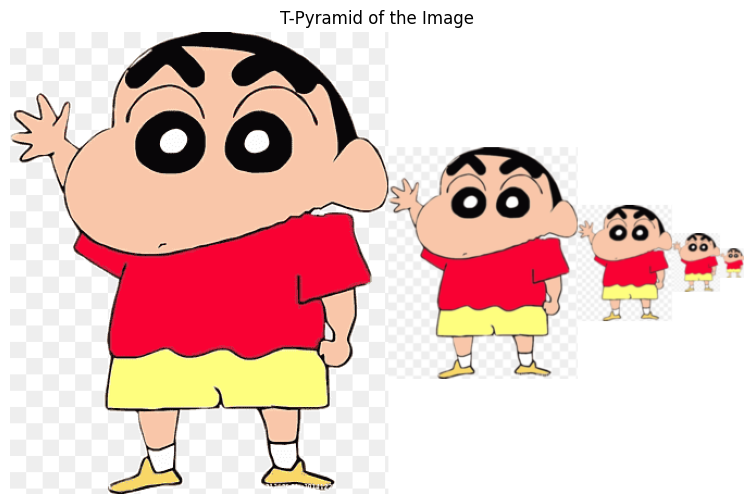

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generate the T-pyramid using pyrDown (reducing resolution at each level)
def generate_t_pyramid(image, levels):
    pyramid = [image]
    for _ in range(levels - 1):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

# Create a single image displaying the T-pyramid
def create_t_pyramid_display(pyramid):
    max_height = max(img.shape[0] for img in pyramid)
    total_width = sum(img.shape[1] for img in pyramid)

    # Create a white canvas to arrange pyramid images
    t_pyramid_image = np.ones((max_height, total_width, 3), dtype=np.uint8) * 255

    x_offset = 0
    for img in pyramid:
        h, w, _ = img.shape
        y_offset = (max_height - h) // 2  # Center vertically
        t_pyramid_image[y_offset:y_offset+h, x_offset:x_offset+w] = img
        x_offset += w  # Move to next position

    return t_pyramid_image

# Load the input image
image = cv2.imread("/content/drive/MyDrive/IVA Assignment-1/image.png")
if image is None:
    print("Error: Image not found!")
    exit()

# Convert BGR to RGB for proper display in Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the number of pyramid levels and generate the pyramid
levels = 5
t_pyramid = generate_t_pyramid(image, levels)
t_pyramid_image = create_t_pyramid_display(t_pyramid)

# Display the T-pyramid using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(t_pyramid_image)
plt.axis("off")  # Hide axis for better visualization
plt.title("T-Pyramid of the Image")
plt.show()

**3.Sample project for Image Smoothing**

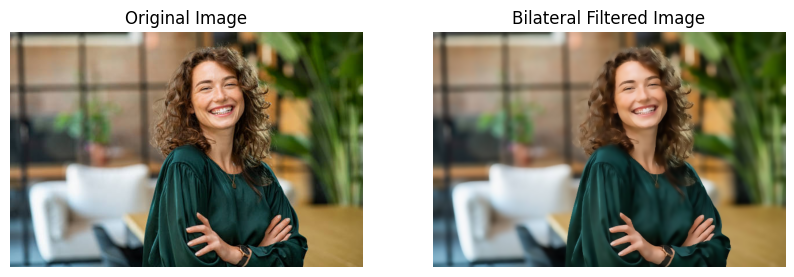

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/drive/MyDrive/IVA Assignment-1/photo.jpg")
if image is None:
    print("Error: Image not found!")
    exit()

# Convert BGR to RGB for correct color display in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply bilateral filtering for edge-preserving smoothing
bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)

# Convert the filtered image to RGB for proper display
bilateral_filtered_rgb = cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Bilateral Filtered Image
plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_rgb)
plt.title("Bilateral Filtered Image")
plt.axis("off")

plt.show()

**4.Sample project for Edge detection using Sobel ,Canny edge**

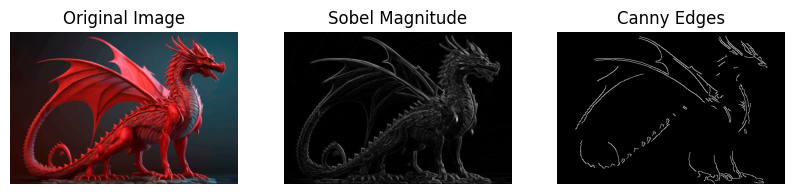

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply Sobel filter to compute gradient magnitude and direction
def sobel_CV2(image):
    sobelx64f = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
    sobely64f = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction
    magnitude = np.hypot(sobelx64f, sobely64f)  # Compute gradient magnitude
    theta = np.arctan2(sobely64f, sobelx64f)  # Compute gradient direction
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)  # Normalize
    return np.uint8(magnitude), theta

# Apply Canny edge detection
def canny_CV2(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

# Load the image
image_path = "/content/drive/MyDrive/IVA Assignment-1/dragon.jpg"
image = cv2.imread(image_path)
if image is None:
    print("Error: Image not found!")
    exit()

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_magnitude, theta = sobel_CV2(gray_image)

# Apply Gaussian blur before Canny edge detection
blurred_image = cv2.GaussianBlur(gray_image, (5,5), 1.4)
canny_edges = canny_CV2(blurred_image, 100, 200)

# Display results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Sobel Edge Detection
plt.subplot(1, 3, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title("Sobel Magnitude")
plt.axis("off")

# Canny Edge Detection
plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

plt.show()

**5.Object Detection with OpenCV**

**● Detect simple objects like faces, eyes, or hands using OpenCV and Haar cascades.**

**● Libraries: OpenCV, NumPy**

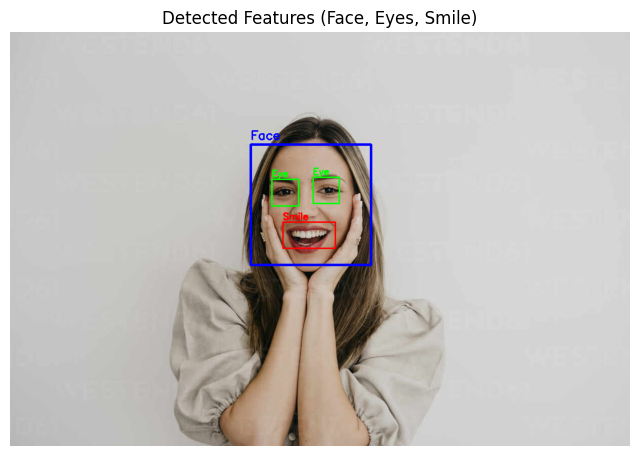

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load Haar cascade classifiers for face, eyes, and smile detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Read the image
image_path = '/content/drive/MyDrive/IVA Assignment-1/woman.jpg'
image = cv2.imread(image_path)
if image is None:
    print("Error: Image not found!")
    exit()

# Convert image to grayscale for detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)  # Draw face rectangle (Blue)
    cv2.putText(image, 'Face', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Region of interest for detecting eyes and smile
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]

    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)  # Green for eyes
        cv2.putText(image, 'Eye', (x + ex, y + ey - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Detect smiles within the face region
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 20)
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)  # Red for smile
        cv2.putText(image, 'Smile', (x + sx, y + sy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Convert image from BGR to RGB for correct Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected features
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Detected Features (Face, Eyes, Smile)")
plt.show()